In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("data/iphone_purchase_records.csv")

In [8]:
df.head(2)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0


In [11]:
gender_dummies = pd.get_dummies(df["Gender"], drop_first = True, dtype = int)

In [12]:
df = df.drop(["Gender"], axis = 1)
df = pd.concat([gender_dummies, df], axis = 1)

In [14]:
df.head(2)

,Male,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0


In [16]:
X = df.drop(["Purchase Iphone"], axis = 1)
y = df[["Purchase Iphone"]]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 10,
    stratify = y # Garantiza que la proporción de clases se mantenga en la partición aleatoria, ideal para clases desbalanceadas
)

### Arbol de decision

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
tree = DecisionTreeClassifier()

In [22]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
tree.score(X_test, y_test)

0.8916666666666667

[Text(0.5, 0.9, 'Age <= 42.5\nsamples = 280\nvalue = [180, 100]'),
 Text(0.3076923076923077, 0.7, 'Salary <= 90500.0\nsamples = 198\nvalue = [166, 32]'),
 Text(0.40384615384615385, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'Age <= 36.5\nsamples = 169\nvalue = [163, 6]'),
 Text(0.07692307692307693, 0.3, 'samples = 112\nvalue = [112, 0]'),
 Text(0.23076923076923078, 0.3, 'Salary <= 77500.0\nsamples = 57\nvalue = [51, 6]'),
 Text(0.15384615384615385, 0.1, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.1, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.5, 'Age <= 26.5\nsamples = 29\nvalue = [3, 26]'),
 Text(0.38461538461538464, 0.3, 'samples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.3, 'Salary <= 116500.0\nsamples = 28\nvalue = [2, 26]'),
 Text(0.46153846153846156, 0.1, '\n  (...)  \n'),
 Text(0.6153846153846154, 0.1, '\n  (...)  \n'),
 Text(0.6923076923076923, 0.7, 'Salary <= 41500.0\nsamples = 82\nvalue = [14.0, 68.0]'),
 Text(0.5961538461538461, 0.8, '  False'),
 Text(0.615

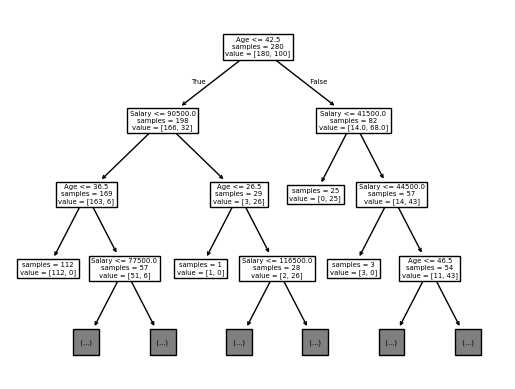

In [29]:
plot_tree(tree, max_depth = 3, feature_names = X.columns, impurity = False)